# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [5]:
#mean calculation
sales = [3505, 2400, 3027, 2798]
mean = sum(sales) / len(sales)

print("Mean of sales is: " + str(mean))

Mean of sales is: 2932.5


In [8]:
#variance Calculation
#get the distance from the specific entry on our list, minus the mean of our
#list. Remember, you are mapping a lambda function to every entry in the sales
#list, and casting the resulting map as a list.
#another way to think of this is the specific (each entry) deviation from the
#mean
distances = list(map(lambda x: x - mean, sales))

#squaring the distances (deviation from the mean)
#same thought as above maping the lambda function to each element of the list,
#and casting the resulting map back to a list
sq_distances =  list(map(lambda x: x**2, distances))

#variation from a population
#the average squared deviation from the poplation mean. aka, a mean of all the
#squared distances.
var_pop = sum(sq_distances) / len(sq_distances)

#variation from a sample
#the convention is this found by dividing by one less than the sample population
#size. I couldn't find any reasonable explanations for this, so I'm taking it as
#a given.

var_samp = sum(sq_distances) / (len(sq_distances) - 1)

print("Population variance: " + str(var_pop))
print("Sample population variance: " + str(var_samp))

Population variance: 159583.25
Sample population variance: 212777.66666666666


In [9]:
#standard deviation is just the square root of the variance
#standard deviation for the population
std_pop =  var_pop**(1/2)
std_samp = var_samp**(1/2)

print('Standard Deviation of a population: ' + str(std_pop))
print('Standard Deviation of a sample population: ' + str(std_samp))

Standard Deviation of a population: 399.47872283765
Standard Deviation of a sample population: 461.2782963316903


In [10]:
#checking my work
import pandas as pd

df = pd.DataFrame({'sales': sales})
print(df['sales'].mean())
print(df['sales'].var(ddof = 0))
print(df['sales'].var(ddof = 1))
print(df['sales'].std(ddof = 0))
print(df['sales'].std(ddof = 1))

2932.5
159583.25
212777.66666666666
399.47872283765
461.2782963316903


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [14]:
#I guess I'll stick with the pandas to calculate this
customers = [127, 80, 105, 91, 120, 115, 93]

df['customers'] = pd.Series(customers)

#remember covariance function in pandas gives us a dataframe of covariances
#between any two columns in a data fram.  We know that sales x sales is index
#[0][0], and since customers is the next (and only other) column then we know
#that covariance of Sales X Customers will be at indices [0][1].
print('Covariance between Sales and Customers is: ' + str(df.cov().values[0][1]))

Covariance between Sales and Customers is: 9263.5


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [15]:
#okay correlation is the covariance divided by the product of the standard
#deviations of each  variable.

cov = df['sales'].cov(df['customers'])

std_sales = df['sales'].std(ddof = 1)
std_customers = df['customers'].std(ddof = 1)

corr = cov / (std_sales * std_customers)

print("Correlation is: " + str(corr))

Correlation is: 0.9906841313337436


In [16]:
#that is one strong looking correlation.  Lets check our work.

df.corr()

,sales,customers
sales,1.000000,0.990684
customers,0.990684,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [35]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv',
                      index_col = 0)
print(titanic.shape)
titanic.head(3)

(1310, 15)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [32]:
titanic.dtypes

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [36]:
num = titanic.select_dtypes(include = ['float64', 'int64'])
print(num.shape)
num.head(3)

(1310, 8)


,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1


In [39]:
cov = num.cov()
cov

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [41]:
corr = num.corr()
corr

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [33]:
#wait a minute, this ish  aint clean! I've been misled!
#can't stop me tho.  I'll come back to this.
num.isnull().sum()

pclass                 1
survived               1
age                    0
sibsp                  1
parch                  1
fare                   2
body                1189
has_cabin_number       0
dtype: int64

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

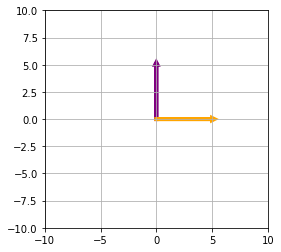

In [46]:
#Perpendicular is a mostly accurate synonym for orthogonal.
import matplotlib.pyplot as plt
import numpy as np

#engaaaaaagge easy mode!
o = np.array([0,5])
p = np.array([5,0])

fig, ax = plt.subplots(figsize = (4, 4))
ax.grid()
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.arrow(0, 0, o[0], o[1], head_width = .2, head_length = .2, linewidth = 4,
          color = 'purple')
plt.arrow(0, 0, p[0], p[1], head_width = .2, head_length = .2, linewidth = 4,
          color = 'orange');



## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

Not Orthogonal!


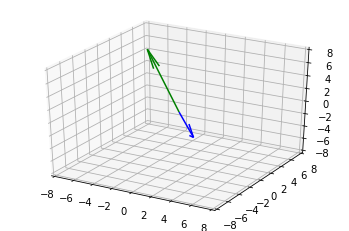

In [57]:
#we can figure this out a few ways. Mathematically (dot product) and plotting.
#dot product is safest, but since these would be 3 dimensional we can plot them
#too!  Lets do both!

a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

print("Orthogonal!") if np.dot(a,b) == 0  else print("Not Orthogonal!")

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.quiver(0, 0, 0, a[0], a[1], a[2], length = 1, color = 'green')
ax.quiver(0, 0, 0, b[0], b[1], b[2], length = 1, color = 'blue')

ax.set_xlim([-8, 8])
ax.set_ylim([-8, 8])
ax.set_zlim([-8, 8]);

#wow what a bad angle to determine orthogonality from! lol  I guess that is why
#dot product can be more reliable. Just look at this, you can tell there is a 
#possibility from a specific angle that this could be orthogonal

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [59]:
#they are all the same.  Lets see if I can explain it before I demonstrate it
#so the norm is the square root of ever value squared then summed. Since we are
#squareing the norm, the square root is effectively cancelled out leaving us
#with effectively every value squared then summed.

#the dot of c by c is going to effectively be c1*c1 + c2*c2...+ cn*cn.  So same
#as above

#cT * c allows us to matrix multiplication.  Since matrix multiplication
#multiplis the columns of the first matrix by the rows of the second, we once
#again get each element squared then summed
c = np.array([2, -15, 20])

norm_sqr = np.linalg.norm(c)**2
dot = np.dot(c, c)
c_trans_c = np.matmul(c.T, c)

print(norm_sqr)
print(dot)
print(c_trans_c)


629.0000000000001
629
629


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

okay so we can think of this as
\being{align}
\begin{bmatrix} 1 \ 0 \\ 0 \ 1 \end{bmatrix}
\quad
\being{bmatrix} 

\end{align}

ehhh don't waste time on this, come back to it
when you are done

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [60]:
#okay to find the unit vector you need to take a vector and divide it by the
#magnitude of that vector, so lets go.

f = np.array([4, 12, 11, 9, 2])
mag = np.linalg.norm(f)

unit = f / mag

print(unit)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
#okay
vec1 = np.array([2, 5])
vec2 = np.multiply(vec1, 3)

fig, ax = plt.subplots(figsize = (4, 4))
ax.grid()
plt.xlim(-3, 3)
plt.ylim(-3, 3)

#display the two vectors
plt.arrow(0, 0, vect1[0], vect1[1], head_width = .2, head_length = .2)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

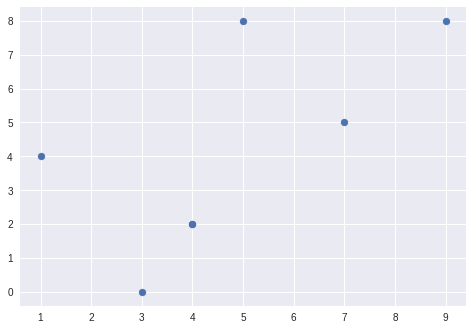

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()